# **LOGISTIC REGRESSION**

1. Data Exploration?

In [ ]:
#a. Load the dataset and perform exploratory data analysis (EDA).

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [2]:
import pandas as pd
from pandas import*
titanic_train=read_csv('Titanic_train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [4]:
titanic_test=read_csv('Titanic_test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
titanic_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
titanic_train=titanic_train.drop(columns=['PassengerId','Name','Ticket','Cabin'])
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
import warnings
warnings.filterwarnings('ignore')
titanic_train['Age'].fillna(titanic_train['Age'].median(),inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
titanic_train[titanic_train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [15]:
titanic_train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [16]:
titanic_train['Embarked']=titanic_train['Embarked'].fillna('S')
titanic_train.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [17]:
titanic_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [18]:
titanic_train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [19]:
titanic_train['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [20]:
titanic_train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [21]:
titanic_train['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [22]:
data=titanic_train['Survived'].value_counts().reset_index()
data

,Survived,count
0,0,549
1,1,342


In [ ]:
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

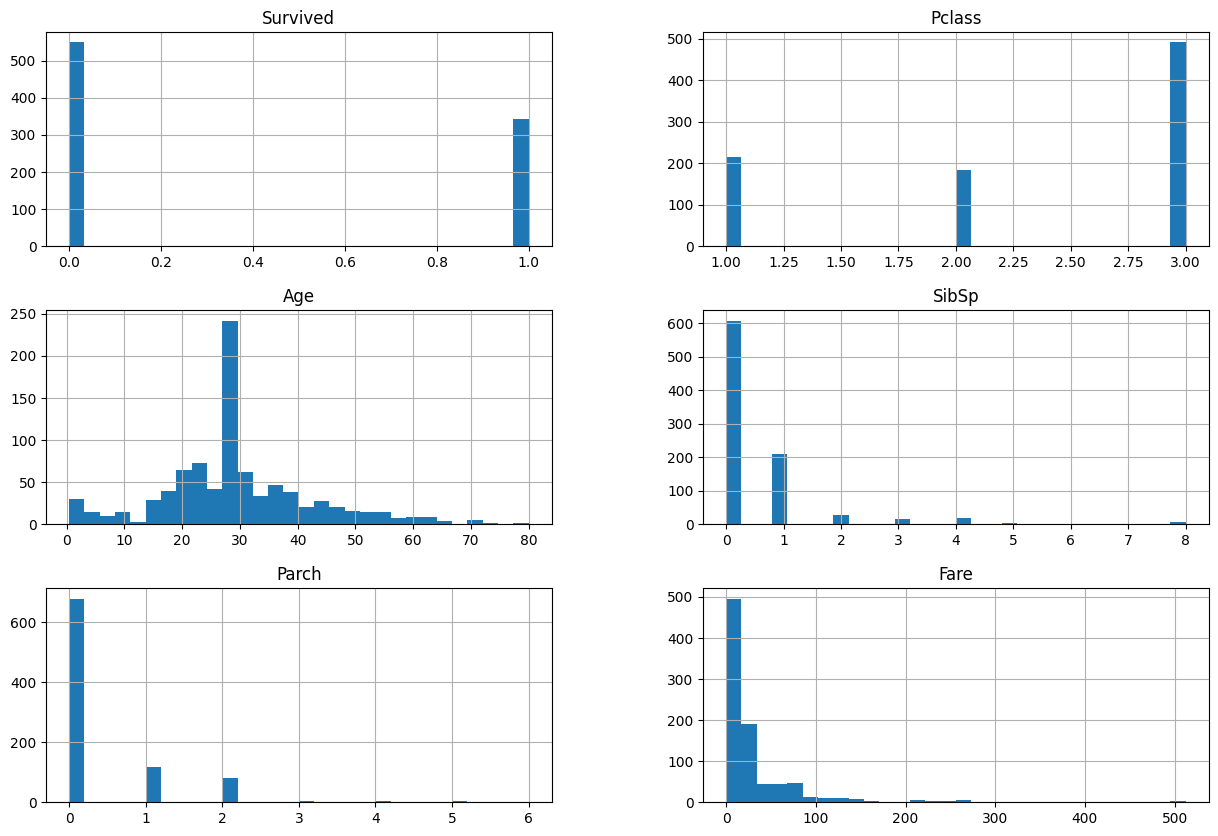

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*
titanic_train.hist(figsize=(15,10),bins=30)
show()

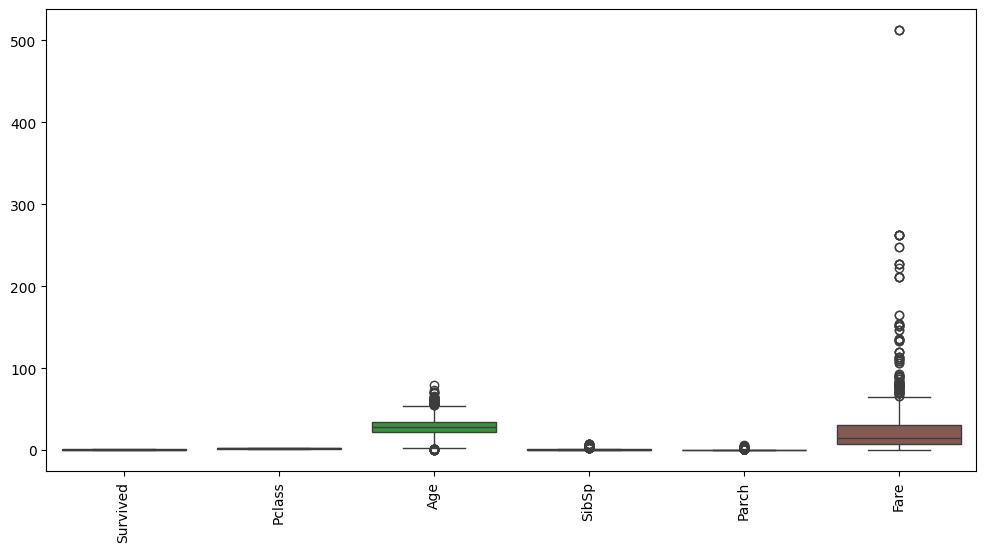

In [24]:
import seaborn as sns
from seaborn import*
figure(figsize=(12,6))
boxplot(data=titanic_train)
xticks(rotation=90)
show()

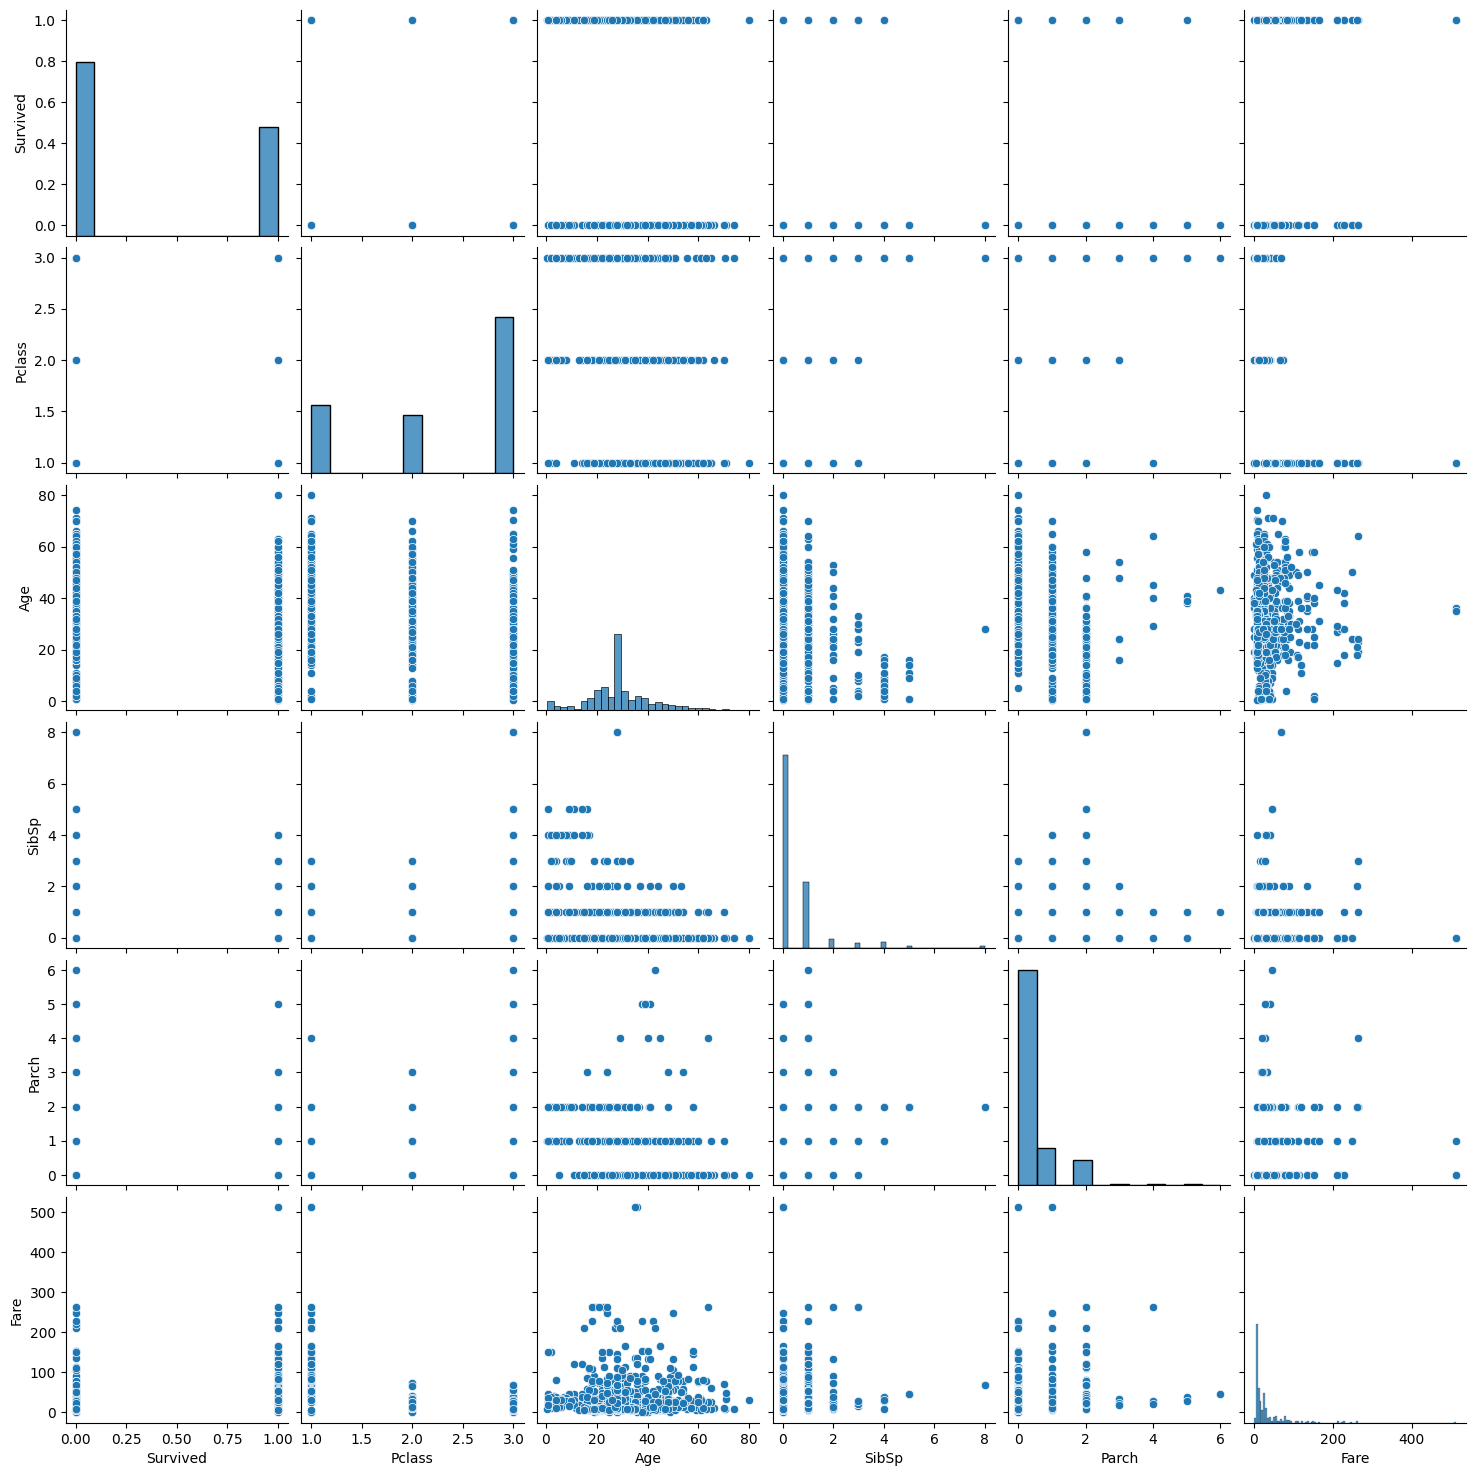

In [25]:
pairplot(titanic_train)
show()

In [26]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
titanic_train['Sex']=label_enc.fit_transform(titanic_train['Sex'])
titanic_train['Embarked']=label_enc.fit_transform(titanic_train['Embarked'])
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [27]:
!pip install klib

In [28]:
import klib as klib
klib.corr_mat(titanic_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.00,-0.34,-0.54,-0.06,-0.04,0.08,0.26,-0.17
Pclass,-0.34,1.00,0.13,-0.34,0.08,0.02,-0.55,0.16
Sex,-0.54,0.13,1.00,0.08,-0.11,-0.25,-0.18,0.11
Age,-0.06,-0.34,0.08,1.00,-0.23,-0.17,0.10,-0.02
SibSp,-0.04,0.08,-0.11,-0.23,1.00,0.41,0.16,0.07
Parch,0.08,0.02,-0.25,-0.17,0.41,1.00,0.22,0.04
Fare,0.26,-0.55,-0.18,0.10,0.16,0.22,1.00,-0.22
Embarked,-0.17,0.16,0.11,-0.02,0.07,0.04,-0.22,1.00


In [29]:
klib.corr_interactive_plot(titanic_train).show()

3. Model Building:

In [ ]:
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split
x=titanic_train.drop('Survived',axis=1)
y=titanic_train['Survived']
print(x.shape,y.shape)

(891, 7) (891,)


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [32]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [33]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [34]:
log_reg.coef_[0]

array([-0.98633533, -2.61427099, -0.03162887, -0.29614435, -0.10570805,
        0.00261958, -0.20747528])

In [35]:
beta_coef=Series(log_reg.coef_[0])
beta_coef

,0
0,-0.986335
1,-2.614271
2,-0.031629
3,-0.296144
4,-0.105708
5,0.002620
6,-0.207475


In [36]:
coefficients=DataFrame({"Columns":Series(x.columns),'Coefficients':Series(log_reg.coef_[0])})
coefficients

,Columns,Coefficients
0,Pclass,-0.986335
1,Sex,-2.614271
2,Age,-0.031629
3,SibSp,-0.296144
4,Parch,-0.105708
5,Fare,0.002620
6,Embarked,-0.207475


In [37]:
log_reg.score(x_train,y_train)

0.8018494055482166

In [38]:
log_reg.score(x_test,y_test)

0.8134328358208955

In [39]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [40]:
print('Accuracy score for Logistic Regression is :',accuracy_score(y_test,y_pred))

Accuracy score for Logistic Regression is : 0.8134328358208955


In [41]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[67, 11],
       [14, 42]])

In [42]:
import plotly.express as px
from plotly.express import*
imshow(conf_matrix,text_auto=True,template='plotly_dark')

4. Model Evaluation:

In [ ]:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        78
           1       0.79      0.75      0.77        56

    accuracy                           0.81       134
   macro avg       0.81      0.80      0.81       134
weighted avg       0.81      0.81      0.81       134



In [44]:
from sklearn.metrics import roc_auc_score,auc
auc=roc_auc_score(y_test,y_pred)
print('ROC-AUC Score :',auc)

ROC-AUC Score : 0.8044871794871795


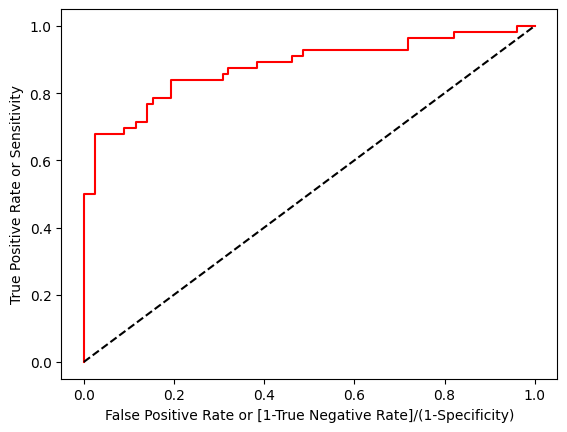

In [45]:
fpr,tpr,thresholds=roc_curve(y_test,log_reg.predict_proba(x_test)[:,1])
plot(fpr,tpr,color='red',label='logit model (area=%0.2f)'%auc)
plot([0,1],[0,1],'k--')
xlabel('False Positive Rate or [1-True Negative Rate]/(1-Specificity)')
ylabel('True Positive Rate or Sensitivity')
show()

5. Interpretation:

In [ ]:
#a. Interpret the coefficients of the logistic regression model.

In [46]:
c=0
for i in titanic_train['Survived']:
  if i==1:
    c+=1
c/len(titanic_train)

0.3838383838383838

In [ ]:
#b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [47]:
print('No of First Class Passengers Who Survived :',len(titanic_train[(titanic_train['Survived']==1)&(titanic_train['Pclass']==1)]))
print('No of Second Class Passengers Who Survived :',len(titanic_train[(titanic_train['Survived']==1)&(titanic_train['Pclass']==2)]))
print('No of Third Class Passengers Who Survived :',len(titanic_train[(titanic_train['Survived']==1)&(titanic_train['Pclass']==3)]))

No of First Class Passengers Who Survived : 136
No of Second Class Passengers Who Survived : 87
No of Third Class Passengers Who Survived : 119


●The overall survival rate was approximately 38.38%.

●Females had a significantly higher survival rate compared to males.

●First-class passengers had the highest survival rate,followed by third-class,and then second-class passengers.

6. Deployment with Streamlit:

In [48]:
import pickle

In [49]:
with open('log_reg.pkl','wb') as file:
  pickle.dump(log_reg,file)

Interview Questions:

1. What is the difference between precision and recall?

●Precision measures the accuracy of positive predictions.

●Recall measures the completeness of positive predictions.

●Precision and recall often have an inverse relationship.

●Increasing precision can lead to lower recall,and vice versa.

2. What is cross-validation, and why is it important in binary classification?

●Cross-Validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.

●In binary classification,especially with imbalanced classes,cross-validation ensures that both classes are adequately represented in both training and validation sets across different iterations.